# Twitter Classification Of Nepal Earthquake Tweets

<h3> About the Disaster</h3><br>
This is case study  on the tweets that are related to the Nepal Eathquake that happened on 15 April 2015.The earthquake killed more than 8,800 people in Nepal and injured nearly three times as many. The rural death toll may have been minimized by the fact that most villagers were outdoors working when the quake hit. As of 15 May, 6,271 people, including 1,700 from the 12 May aftershock, were still receiving treatment for their injuries.Nearly 3.5 million people were left homeless.

### Role Of Social Media

in a critical situation like these social media platforms like Twitter are increasingly being used for aiding relief operations. However, messages posted on such places often contain rumours and overstated facts. Hence cross verification of such critical information is a practical necessity and resource availability.<br><br>

In this notebook, I am conducting a similar investigation on the dataset.

### Dataset:
The dataset is in the form of a txt file:<br>
https://drive.google.com/file/d/18c33mwHSkcukt5UiB9TMphCQBzyIokCI/view?usp=sharing/
<br>The text file contains tuples in the form:<br>
(target  class,Tweet id,Tweet’s text)

### <i>Class Description of the Tweets given in the dataset</i>
0 :The tweet doesn’t talk about any resources needed or available(Irrelevant tweets)<br>
1 :The tweet mentions a resource that is needed (Need Tweets)<br>
2 :The tweet mentions a resource that is available(Availability tweets)

## The solution is divided into following section:
<ol>
    <li>Data understanding and exploration.</li>
    <li>Data Preprocessing.</li>
    <li>Data preparation.</li>
    <li>Model building and evaluation.</li>
</ol>

## 1. Data Understanding and Exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from PIL import Image

<b>We read the data from train.txt file. Since the data are  in the form of tuples so we first need to convert the data into a DataFrame.<b>

In [2]:
with open("data/Train.txt","r",encoding='UTF-8') as file:
    data = pd.DataFrame(file.readlines())
data[0][0]

"(0, '591764470197723137', '#Nepal #news Adding to Bhutanese Refugees Bhutanese citizens of Nepalese origin still refrain from leaving their bags.')\n"

In [3]:
df = data[0].str.split(pat =r"(\(|'*,\s*(\"|\')|'\))",expand=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,,(,None,0,", '",',591764470197723137,"', '",',#Nepal #news Adding to Bhutanese Refugees Bhut...,'),None,\n,None,None,None,None,None,None
1,,(,None,0,", '",',591779538046218240,"', ""","""",The massacre of people's movement says peace a...,None,None,None,None,None,None,None,None,None
2,,(,None,0,", '",',591728244925210624,"', ""","""","I'm lonely, maybe you're going to die without ...",None,None,None,None,None,None,None,None,None
3,,(,None,0,", '",',591774433926193152,"', '",',#nepal #news 6 billion collection collection 1...,'),None,\n,None,None,None,None,None,None
4,,(,None,0,", '",',591764472651386882,"', '",',#Nepal #news Indian proposal to crash airport ...,'),None,\n,None,None,None,None,None,None


Since the data is in string format we need to typecast columns like **__Target Class__** to integer.

In [4]:
def preprocess(raw_tweet):
    raw_tweet = re.sub("#\w+", "",raw_tweet)
    raw_tweet = raw_tweet.replace("Nepal","")
    raw_tweet = raw_tweet.replace("Earthquake","")
    raw_tweet = raw_tweet.replace("nepal","")
    raw_tweet = raw_tweet.replace("earthquake","")
    return(raw_tweet.lower())

In [5]:
data=df[[3,6,9]]

data.rename(columns={3:"Target Class",6:"Tweet_Id",9:"Tweet_Text"},inplace=True)
data = data.astype({'Target Class': np.int64,'Tweet_Id':np.int64, 'Tweet_Text':str})

# data["Tweet_Text"].replace(to_replace=['Nepal','Earthquake',"nepal","earthquake"],value=["","","",""],inplace=True)
data["Tweet_Text"] = data['Tweet_Text'].apply(lambda x: preprocess(x))

c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [6]:
data['Tweet_Text'][0]

'  adding to bhutanese refugees bhutanese citizens of ese origin still refrain from leaving their bags.'

In [7]:
print(data.shape)
print(data.columns)

(18233, 3)
Index(['Target Class', 'Tweet_Id', 'Tweet_Text'], dtype='object')


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Data columns (total 3 columns):
Target Class    18233 non-null int64
Tweet_Id        18233 non-null int64
Tweet_Text      18233 non-null object
dtypes: int64(2), object(1)
memory usage: 356.2+ KB


In [9]:
data['Target Class'].value_counts()

0    17370
2      664
1      199
Name: Target Class, dtype: int64

In [10]:
data[data.duplicated() == True].count()

Target Class    0
Tweet_Id        0
Tweet_Text      0
dtype: int64

### We can see that out dataset does not have any duplicate values.

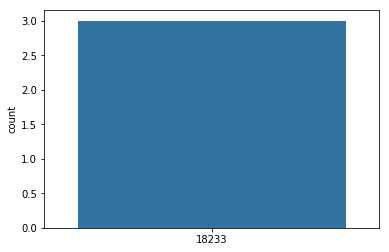

In [11]:
sns.countplot(data.isnull().count())

### Clearly, data doesn't contain any null value.

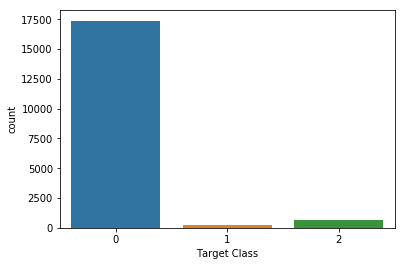

In [12]:
sns.countplot(x='Target Class', data=data)

In [13]:
data['Length'] = data['Tweet_Text'].apply(len)
data.head()

,Target Class,Tweet_Id,Tweet_Text,Length
0,0,591764470197723137,adding to bhutanese refugees bhutanese citiz...,102
1,0,591779538046218240,the massacre of people's movement says peace a...,90
2,0,591728244925210624,"i'm lonely, maybe you're going to die without ...",109
3,0,591774433926193152,6 billion collection collection 12 in one ye...,103
4,0,591764472651386882,indian proposal to crash airport to crash ai...,70


In [14]:
data.groupby('Target Class').count()

,Tweet_Id,Tweet_Text,Length
Target Class,,,
0,17370,17370,17370
1,199,199,199
2,664,664,664


In [15]:
d = (data.groupby('Target Class')['Length'].apply(lambda x: np.mean(x)))
print(d)

Target Class
0    74.543063
1    85.582915
2    86.950301
Name: Length, dtype: float64


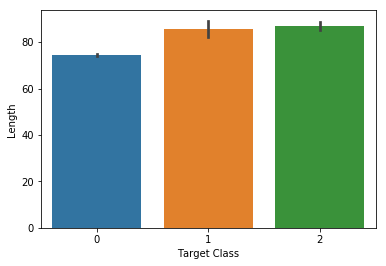

In [16]:
sns.barplot(x='Target Class' ,y='Length',data = data)

#### This show that tweets that talks about Available Resources are lengthy as compared to other tweets.

In [17]:
irrelevant_tweets = data[data['Target Class']==0]
need_tweets = data[data['Target Class']==1]
available_tweets = data[data['Target Class']==2]
print(irrelevant_tweets.shape)
print(need_tweets.shape)
print(available_tweets.shape)

(17370, 4)
(199, 4)
(664, 4)


#### Let's see what happens if we remove the Irrelevent Tweets from the data.

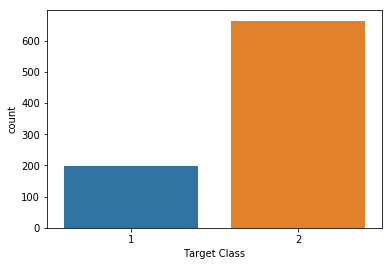

In [18]:
data = data[data['Target Class']!=0]
sns.countplot(x='Target Class', data=data)

<b><i>Nothing Useful happens as still the dataset is skewed. So we have to find some other solution</i></b>

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

vect_irrelevant = CountVectorizer(stop_words='english')

vect_need = CountVectorizer(stop_words='english')

vect_available = CountVectorizer(stop_words='english')

irrelevant_data = vect_irrelevant.fit_transform(irrelevant_tweets['Tweet_Text'])
need_data = vect_need.fit_transform(need_tweets['Tweet_Text'])
available_data = vect_available.fit_transform(available_tweets['Tweet_Text'])

In [20]:
irrelevant_word = vect_irrelevant.get_feature_names()
irrelevant_freqs = irrelevant_data.sum(axis=0).A1
irrelevant_result = dict(zip(irrelevant_word,irrelevant_freqs))
print(len(irrelevant_word))

15011


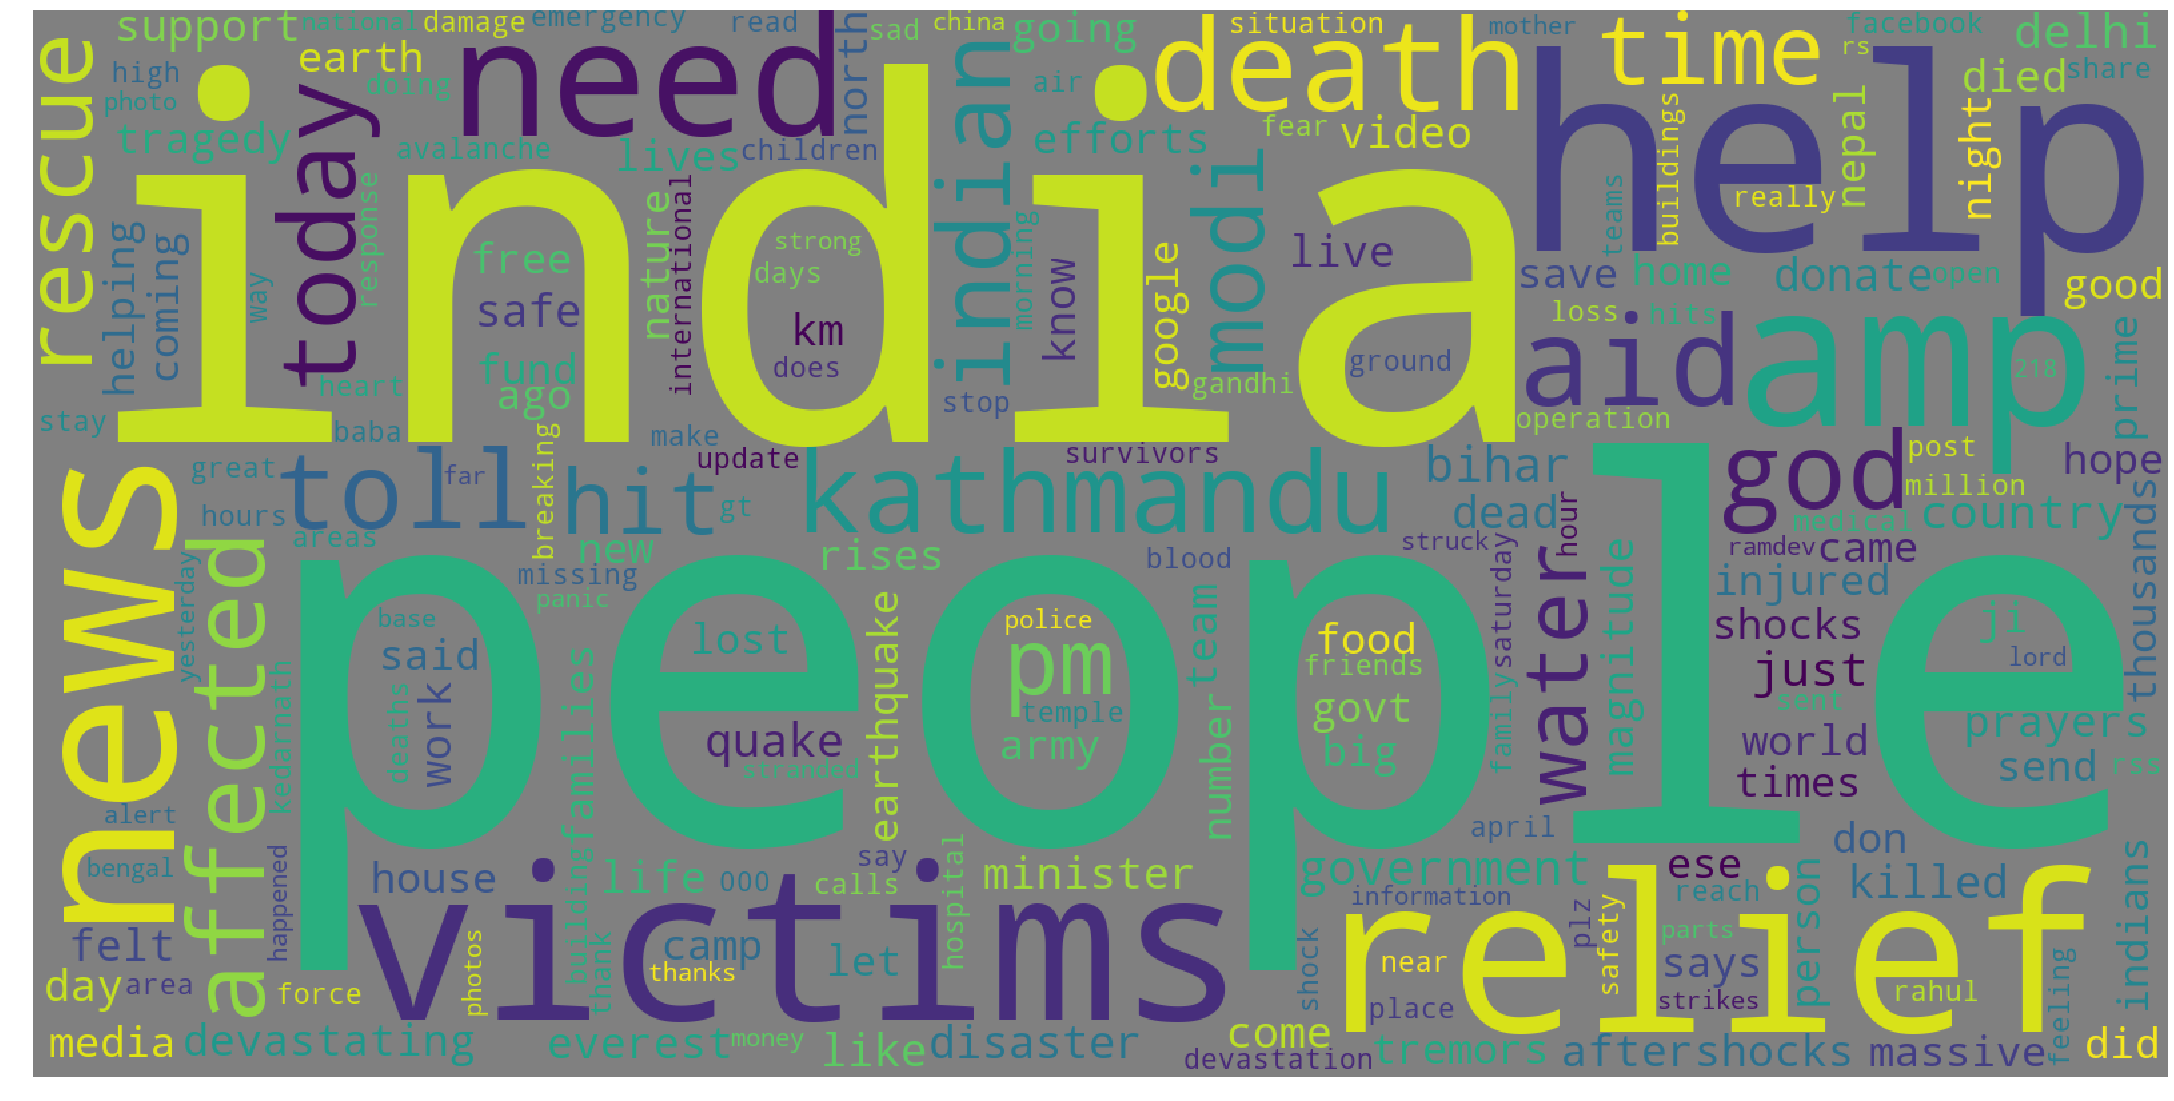

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='grey',
                        width=1600,
                        height=800,
                    ).generate_from_frequencies(irrelevant_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("irrelevant_word_cloud.png")
plt.show()

In [22]:
need_word = vect_need.get_feature_names()
need_freqs = need_data.sum(axis=0).A1
need_result = dict(zip(need_word,need_freqs))
print(len(need_word))

721


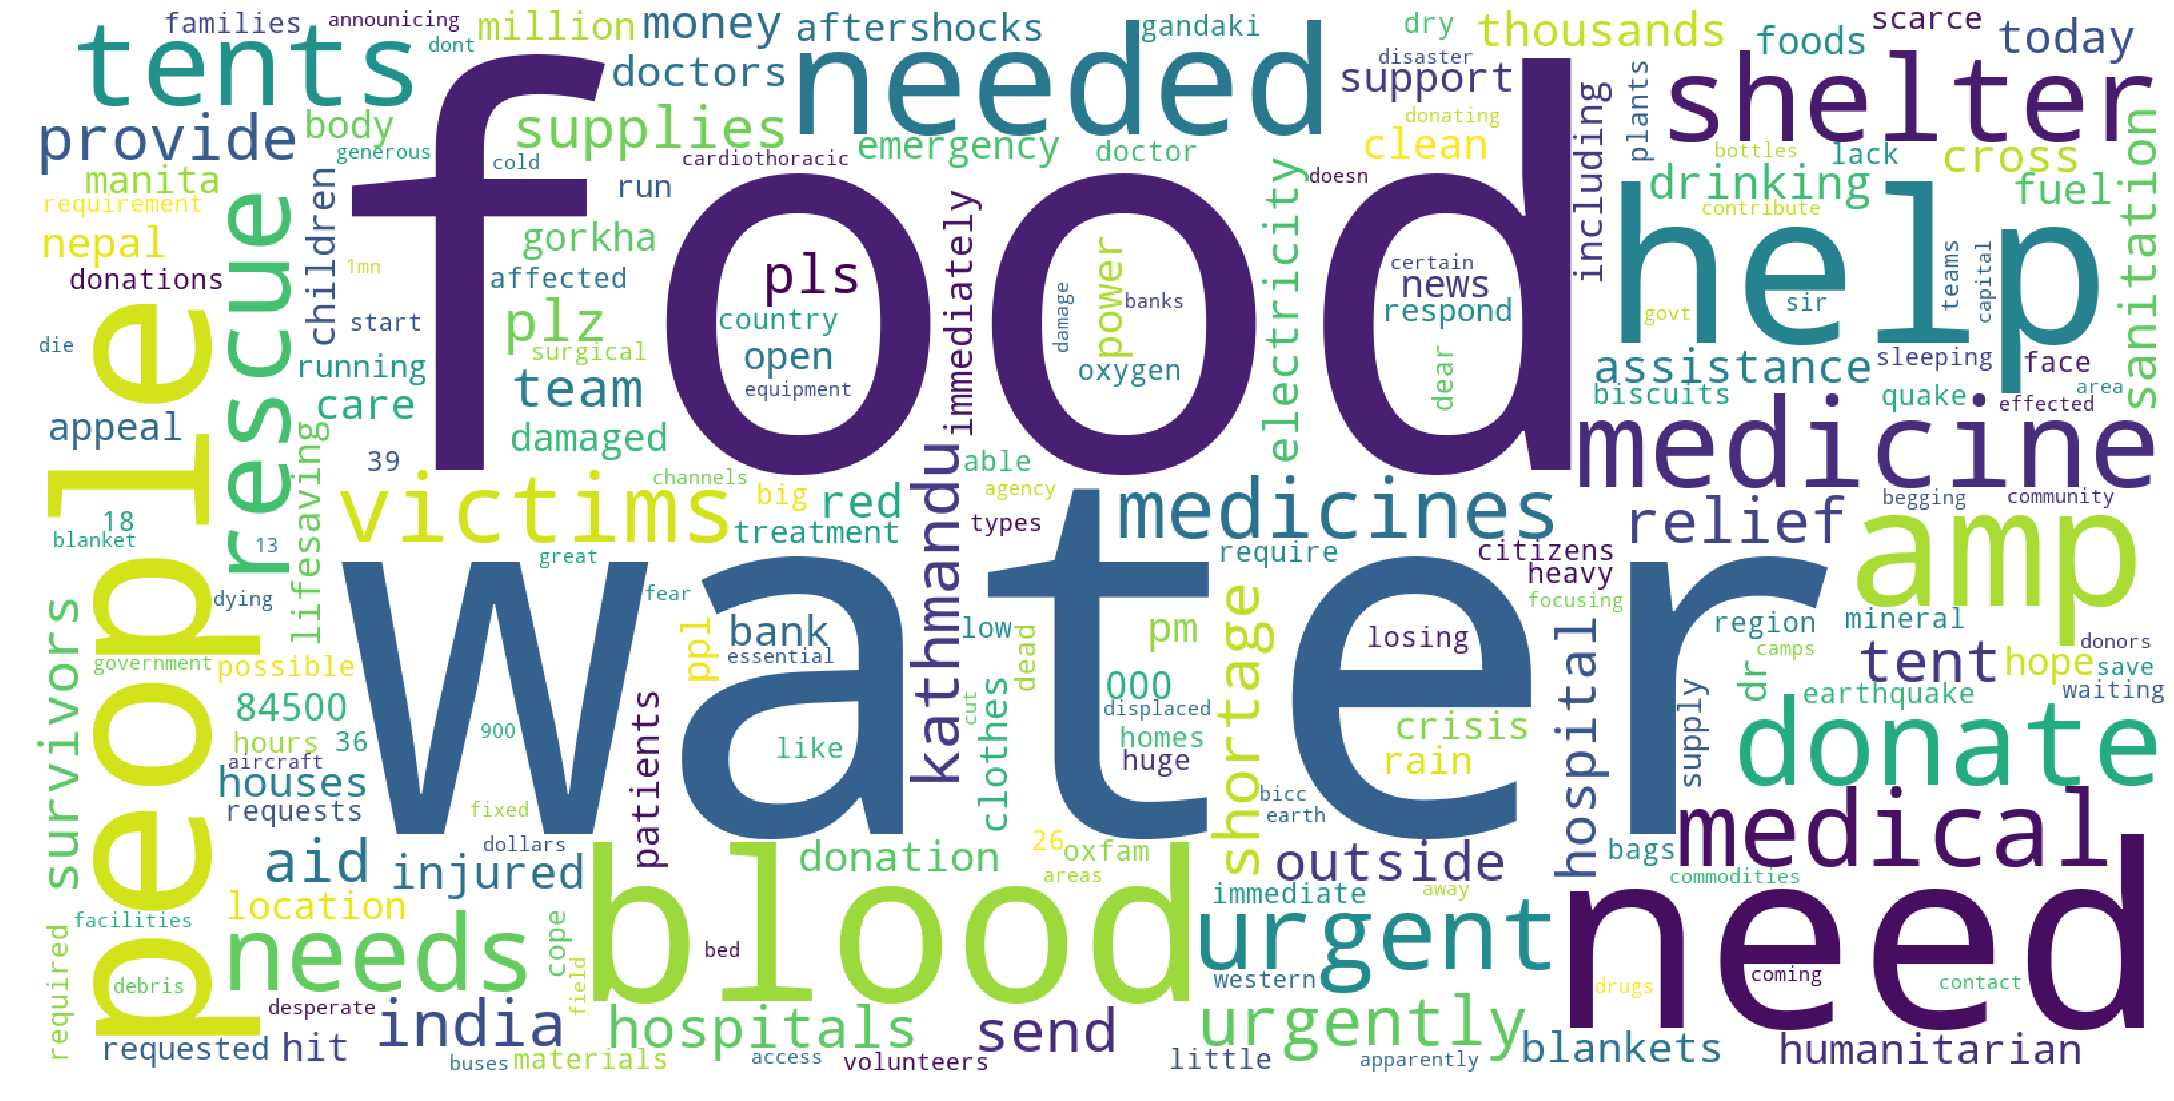

In [23]:
wordcloud = WordCloud(background_color='white',
                        width=1600,
                        height=800,
                    ).generate_from_frequencies(need_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("need_wordcloud.png")
plt.show()

In [24]:
available_word = vect_available.get_feature_names()
available_freqs = available_data.sum(axis=0).A1
available_result = dict(zip(available_word,available_freqs))
print(len(available_word))

1483


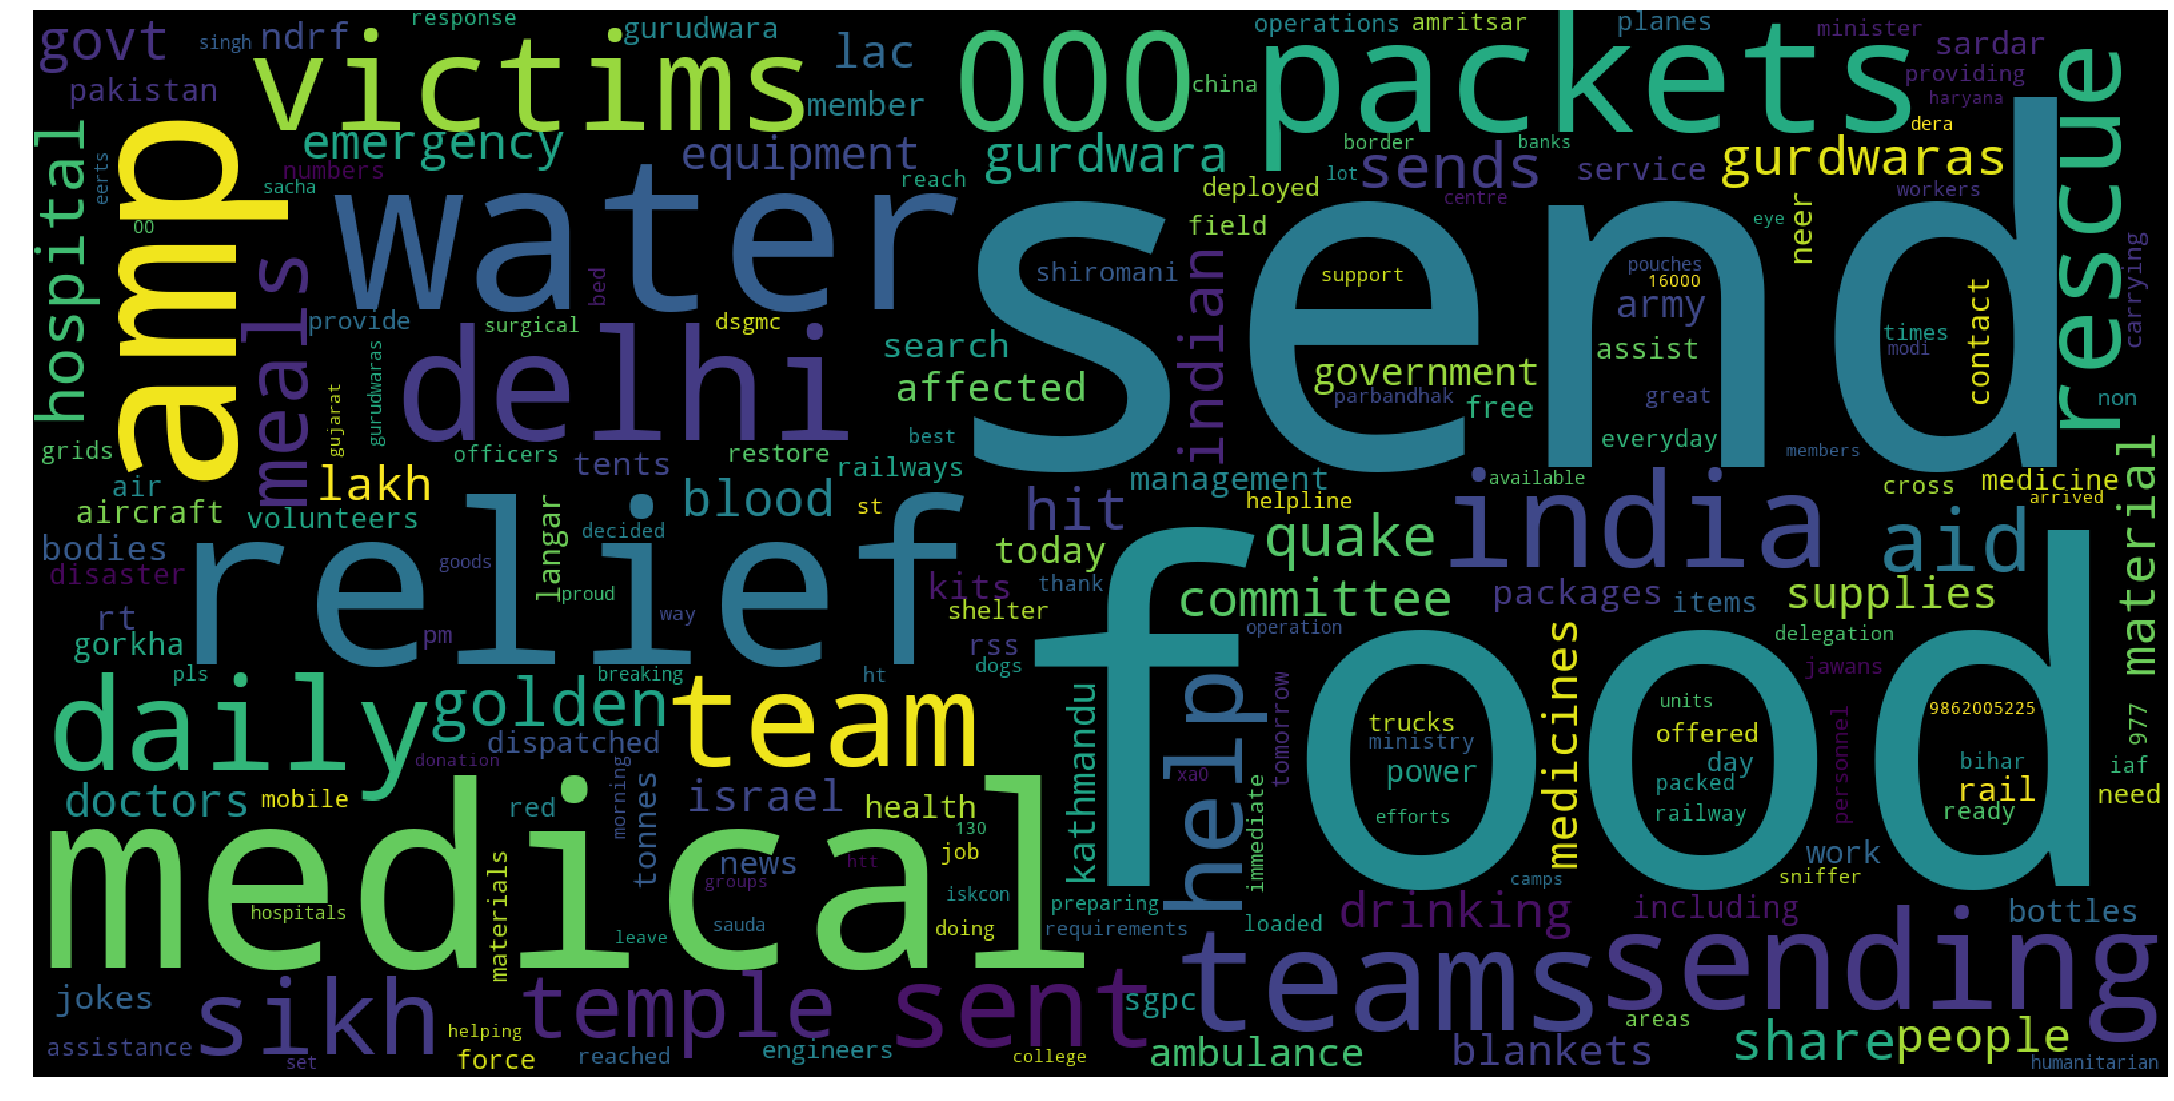

In [25]:
wordcloud = WordCloud(background_color='black',
                        width=1600,
                        height=800,
                    ).generate_from_frequencies(available_result)

fig = plt.figure(figsize=(30,20),facecolor = 'w')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("available_wordcloud.png",facecolor = 'w')
plt.show()

In [26]:
x = data['Tweet_Text']
y = data['Target Class']

## Since the dataset is skewed we need to use stratified shuffle split to split the data

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
Split = StratifiedShuffleSplit(test_size=0.2, random_state=0)
Split.get_n_splits(x, y)
for train, test in Split.split(x, y):
    x_train, x_test = x.iloc[train], x.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

Train_Vector = TfidfVectorizer(lowercase=True)
x_train=Train_Vector.fit_transform(x_train.values)
x_test=Train_Vector.transform(x_test.values)

# 4. Model Building And Evaluation

<h3><b>Following Models are trained on the given data</b></h3>
<ol>
    <li>LogisticRegression</li>
    <li>KNN (K Nearest Neighbor)</li>
    <li>SVM (Support Vector Machine) With Linear and RBF Kernel</li>
    <li>Naive Bayes</li>
    <li>Decision Tree</li>
    <li>Random Forest</li>
</ol>

## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression

Regressor1 = LogisticRegression()
Regressor1.fit(x_train,y_train)

c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_pred1 = Regressor1.predict(x_test)

In [31]:
from sklearn.metrics import confusion_matrix , f1_score
score1=f1_score(y_test,y_pred1, average='weighted')
print("F1 Score: ",score1)

F1 Score:  0.843000929706132


In [32]:
print(confusion_matrix(y_test,y_pred1))

[[ 18  22]
 [  2 131]]


## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

Regressor2 = KNeighborsClassifier(n_neighbors=7)
Regressor2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [58]:
y_pred2 = Regressor2.predict(x_test)

In [59]:
score2 = f1_score(y_test,y_pred2, average='weighted')
print("F1 Score: ",score2)

F1 Score:  0.9003677844385238


In [60]:
print(confusion_matrix(y_test,y_pred2))

[[ 30  10]
 [  7 126]]


## SVM with Linear Kernel

In [37]:
from sklearn.svm import SVC

Regressor3 = SVC(kernel='linear')
Regressor3.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
y_pred3 = Regressor3.predict(x_test)

In [39]:
score3 = f1_score(y_test,y_pred3, average='weighted')
print("F1 Score: ",score3)

F1 Score:  0.9120892215634034


In [40]:
print(confusion_matrix(y_test,y_pred3))

[[ 31   9]
 [  6 127]]


## SVM with RBF Kernel

In [41]:
Regressor4 = SVC(kernel='rbf')
Regressor4.fit(x_train,y_train)

c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pred4 = Regressor4.predict(x_test)

In [43]:
score4 = f1_score(y_test,y_pred4, average='weighted')
print("F1 Score: ",score4)

F1 Score:  0.6682912085836261


c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [44]:
print(confusion_matrix(y_test,y_pred4))

[[  0  40]
 [  0 133]]


## Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
Regressor5 = MultinomialNB()
Regressor5.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
y_pred5 = Regressor5.predict(x_test)

In [47]:
score5 = f1_score(y_test,y_pred5, average='weighted')
print("F1 Score: ",score5)
print(confusion_matrix(y_test,y_pred5))

F1 Score:  0.7643912194053676
[[  9  31]
 [  2 131]]


## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

Regressor6 = DecisionTreeClassifier(criterion='gini')
Regressor6.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [49]:
y_pred6 = Regressor6.predict(x_test)

In [50]:
score6 = f1_score(y_test,y_pred6, average='weighted')
print("F1 Score: ",score6)

F1 Score:  0.8384487473884893


In [51]:
print(confusion_matrix(y_test,y_pred6))

[[ 23  17]
 [ 10 123]]


## Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

Regressor7 = RandomForestClassifier(criterion='gini')
Regressor7.fit(x_train,y_train)

c:\users\prateek\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
y_pred7 = Regressor7.predict(x_test)

In [54]:
score7 = f1_score(y_test,y_pred7, average='weighted')
print("F1 Score: ",score7,end="\n\n")
print(confusion_matrix(y_test,y_pred7))

F1 Score:  0.8896839731779631

[[ 30  10]
 [  9 124]]


In [55]:
F1_Score = [score1,score2,score3,score4,score5,score6,score7]

df = {'F1 Score' : F1_Score,
      'Algorithm' : ['Logistic Regression','KNN','SVM Linear','SVM RBF',"Naive Bayes","Decision Tree",
                       'Random Forest']}

Accuracy =pd.DataFrame(df)
Accuracy

,F1 Score,Algorithm
0,0.843001,Logistic Regression
1,0.899365,KNN
2,0.912089,SVM Linear
3,0.668291,SVM RBF
4,0.764391,Naive Bayes
5,0.838449,Decision Tree
6,0.889684,Random Forest


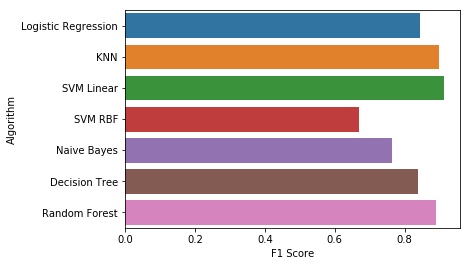

In [56]:
sns.barplot(y="Algorithm", x="F1 Score",data=Accuracy);

## SVM with Linear Kernel has the maximum  accuracy with Highest F1 Score